# Introduction to PCA
<article class="message is-info">
  <div class="message-header">Overview</div>
  <div class="message-body">
  
  This exercise contains two parts. The exercise is about implementing and applying PCA to a database consisting of face shapes. The exercise lays the foundations for assignment 2. **Part 2 of this exercise is intented for next week**.

  
  </div>
</article>

<article class="message is-danger">
  <div class="message-header">Important</div>
  <div class="message-body">

  This exercise and the **in-class** exercise are very similar, but use different datasets. In this exercise you should use your implementation from the in-class exercise, but we advise that you actually go through the steps again to understand the algorithm and not only the results.


  </div>
</article>

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#implementation">Task 1: Dimensionality reduction</a>
            </li>
            <li>
            <a href="#implementation2">Task 2: Dimensionality reduction</a>
            </li>
            <li>
            <a href="#implementation3">Task 3: Dimensionality reduction</a>
            </li>
            <li>
            <a href="#implementation4">Task 4: Mapping between spaces</a>
            </li>
            <li>
            <a href="#implementation5">Task 5: Dimensionality reduction</a>
            </li>
            <li>
            <a href="#eval2">Task 6: Evaluating reconstruction error</a>
            </li>
            <li>
            <a href="#eval">Task 7: Reflection on reconstruction</a>
            </li>
        </ul>
    </div>
</article>

# Part 1
## Data
The dataset used for the assigment consists of 120 landmarks (2D points) of faces (data space). A face consists of 73 (x,y)-coordinate pairs, i.e. 146 featues in total.
The following cell imports the necessary libraries, loads the data and uses the function `plot_many_faces`
 to  visualize 6 faces.


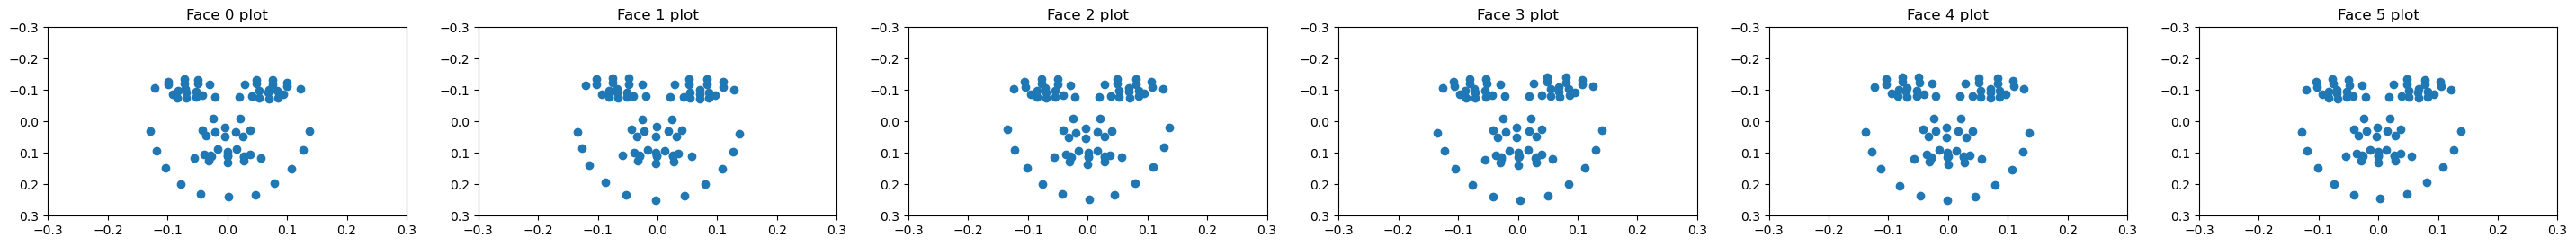

[1 2]


In [36]:
import matplotlib.pyplot as plt
import numpy as np

from pca_utils import *

path = './db'
shapes, images = face_shape_data(path)
plot_many_faces(shapes[:6])
print(images)

## Implementing PCA
An application of principal component analysis is about finding a linear transformation (projection)
that reduces the number of dimensions used to represent the data while
retaining a certain proportion of the total variation. 
This exercise will use the following definitions:
Let the covariance matrix be:

$$
\Sigma = \frac{1}{n-1} X^{\top} X
$$
Let $X$ $\in \mathbb{R}^{N \times D}$ be the data matrix, $C$ $\in \mathbb{R}^{D \times D}$ the covariance matrix of $X$, and $V$ $\in \mathbb{R}^{D \times D}$ the matrix of eigenvectors of $C$ where each eigenvector is placed in the columns of $V$:

$$

{V} = \begin{bmatrix} | & | & & | \\ {v}_1 & {v}_2 & \cdots & {v}_D  \\ | & | & & | \end{bmatrix}.

$$
Assume, the eigenvectors ${v}_i$ are sorted according to their eigenvalues $\lambda_i$. The eignevalue of the covariance matrix $\lambda_i$ gives the variance along the eignevector directions. The sum of all eigenvalues $\lambda^{(1)}+\dots+\lambda^{(D)}$ gives the total variance of the data. 
(1) **Proportional variance** is the proportion of the total variance explained by a single principal component. 

$$\frac{\lambda^{(i)}}{\lambda^{(1)} + \dots + \lambda^{(D)}}$$
(2) **Cumulative variance** is the cumulative proportion of the total variance explained by the first $k$ components.

$$\frac{\lambda^{(1)} + \dots + \lambda^{(k)}}{\lambda^{(1)} + \dots + \lambda^{(D)}}$$
Define $\Phi$, as the $D\times D$ matrix of the all eigenvectors of $V$:

$$

{\Phi} = \begin{bmatrix} | & | & & | \\ {v}_1 & {v}_2 & \cdots & {v}_D \\ | & | & & | \end{bmatrix}.

$$
Define $\Phi_k$, as the $D\times k$ matrix of the first $k$ eigenvectors of $V$:

$$

{\Phi_k} = \begin{bmatrix} | & | & & | \\ {v}_1 & {v}_2 & \cdots & {v}_k \\ | & | & & | \end{bmatrix}.

$$
The column vectors of ${\Phi_k}$ constitute the orthonormal basis of the latent space. ${\Phi_k}$ can be used to transform data points between the data space and the latent space. The mapping of a point $x$ from data space to latent space is given by:

$$ 
\mathbf{a} = \mathbf{\Phi_k}^\top(\mathbf{x}-\mathbf{\mu}),
$$
and back into data space:

$$
x  = \mathbf{\Phi_k} \mathbf{a} + \mathbf{\mu}
$$
If $k = D$ (keeping all dimensions) will result in no data loss because it is a change of basis in the same $D$ dimensions. Retaining  $k<D$  principal components and consequently discarding the remaining  $r = D - k$  components, it is effectively assumed that these $r$ components do not contain significant information, e.g. noise. The percentage of the total variance that is removed is given by:

$$\frac{\lambda^{(D-k)} + \dots + \lambda^{(D)}}{\lambda^{(1)} + \dots + \lambda^{(D)}}$$
where  $\lambda^{(i)}$  are the eigenvalues sorted in descending order $( \lambda^{(1)} \geq \lambda^{(2)} \geq \dots \geq \lambda^{(D)} )$.
That is there will be a _reconstruction error_ $\epsilon = x - \tilde{x}$,  by first mapping the data $x$ to latent space by $\mathbf{a} = \mathbf{\Phi_k}^\top(\mathbf{x}-\mathbf{\mu})$ and then  back to data space by $\tilde{x}  = \mathbf{\Phi_k} \mathbf{a} + \mathbf{\mu}$.
The next task is about implementing PCA and transforming data between data space and latent space.
<article class="message task"><a class="anchor" id="implementation"></a>
    <div class="message-header">
        <span>Task 1: Dimensionality reduction</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          
          
          <i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. **Complete PCA:** Following the comments in the function template, complete the `get_principle_components`
 function below to calculate and return all principle components of the dataset. **Make sure to center the samples (subtract the mean before calculating the covariance matrix)**.

2. **Calculate variance:** Complete the `variance_proportion_plot`
 function according to the comments in the function template to calculate the _proportional_ and _cumulative_ variance. The function includes code to plot both on a single graph. Once the function is complete, generate the plot to display the _proportional_ and _cumulative_ variances.




</div></article>



In [37]:
def mean_and_center_data(X):
    mean_vec = np.mean(X, axis=0)
    return mean_vec, (X - mean_vec) 

def get_cov_matrix(X):
    return np.cov(X, rowvar=False)

def get_eigen_values_and_vectors(cov_matrix):
    return np.linalg.eigh(cov_matrix)

def get_variance(vals):
    total = np.sum(vals)
    cumulative = np.cumsum(vals)
    proportion = cumulative / total
    each = vals / total
    return total, cumulative, proportion, each

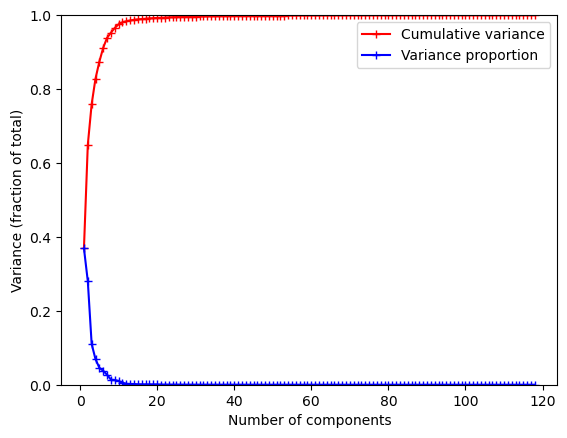

In [38]:
## 1

def get_principle_components(X):
    """Calculates principle components for X.

    Args:
        X: The dataset. An NxD array were N are the number of samples and D are
        the number of features.

    Returns:
        Tuple (components, eigenvalues, mu) where components is a DxD matrix of
        principle components, eigenvalues is a D-element vector of
        corresponding eigenvalues, and mu is a D-element array containing the mean
        vector.
    """

    mean_vector, centered_data = mean_and_center_data(X)
    cov_matrix = get_cov_matrix(centered_data)
    eigen_values, eigen_vectors = get_eigen_values_and_vectors(cov_matrix)

    idx_asc = np.argsort(eigen_values)
    idx = idx_asc[::-1]

    eigen_values_sorted = eigen_values[idx]
    eigen_vectors_sorted = eigen_vectors[:, idx]

    return (eigen_vectors_sorted, eigen_values_sorted, mean_vector)
        
## 2 

def variance_proportion_plot(pc_values, max=1):
    """
    Plots the cumulative and individual variance proportions for principal components.

    Args:
        pc_values: 1D array of eigenvalues representing the variance explained by each principal component.
        max: Maximum cumulative variance proportion to display (between 0 and 1).

    Returns:
        None. Displays a plot of cumulative and individual variance proportions.
    """
    # Calculate total variance, cumulative variance, and individual variance proportions
    total, cumulative, proportion, each = get_variance(pc_values)

    # Find the minimum number of components required to reach the desired cumulative variance
    max_idx = np.argwhere(proportion >= max - 1e-7)[0, 0]
    
    # Set the x-axis values (number of components) up to the determined threshold
    x = np.arange(1, max_idx + 1, 1)

    # Create the plot
    plt.figure()
    plt.xlabel('Number of components')
    plt.ylabel('Variance (fraction of total)')
    
    # Plot cumulative variance proportion and individual variance proportion
    plt.plot(x, proportion[:max_idx], 'r-+', label='Cumulative variance')
    plt.plot(x, each[:max_idx], 'b-+', label='Variance proportion')

    # Set the y-axis limit and add a legend
    plt.ylim(0, 1)
    plt.legend(['Cumulative variance', 'Variance proportion'])
    
    # Display the plot
    plt.show()

comp, val, mu = get_principle_components(shapes)
variance_proportion_plot(val)

# PCA Exercises
<article class="message task"><a class="anchor" id="implementation"></a>
    <div class="message-header">
        <span>Task 2: Dimensionality reduction</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          <i class="bi bi-lightbulb-fill"></i>
          <i class="bi bi-file-ppt" style="color: blue;"></i>
          <i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. What is the total variance of the dataset?
2. What is the variance and percentage explained by the first component?
3. What is the variance and percentage explained by the first $k$ components?
    - $k = 5$
    - $k = 10$
    - $k = 20$


</div></article>



In [39]:
total, cumulative, proportion, each = get_variance(val)
#print(f"Total: {total}")
#print(f"cumulative: {cumulative}\n")
#print(f"proportion: {proportion}\n")
#print(f"each: {each}\n")

print(f"01. Total variance of the dataset: {total}\n")

print(f"02. Variance & percentage of the first component: {cumulative[0]} & {each[0] * 100}%\n")

print(f"03. a Variance & percentage of the first k = 05 component: {cumulative[4]} & {proportion[4] * 100}%")
print(f"03. b Variance & percentage of the first k = 10 component: {cumulative[9]} & {proportion[9] * 100}%")
print(f"03. c Variance & percentage of the first k = 20 component: {cumulative[19]} & {proportion[19] * 100}%")

01. Total variance of the dataset: 0.008592833338490986

02. Variance & percentage of the first component: 0.0031701599797023124 & 36.89306954787318%

03. a Variance & percentage of the first k = 05 component: 0.007511996886010567 & 87.42165232463093%
03. b Variance & percentage of the first k = 10 component: 0.008381496764050965 & 97.54054843012777%
03. c Variance & percentage of the first k = 20 component: 0.008526808470162073 & 99.2316286639337%


<article class="message task"><a class="anchor" id="implementation2"></a>
    <div class="message-header">
        <span>Task 3: Dimensionality reduction</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          
          <i class="bi bi-file-ppt" style="color: blue;"></i>
          <i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Explain why the matrix $V$ is orthonormal? 
2. In the cell below, verify that $V$ is orthonormal for your dataset.
3. Calculate the inverse of $V$ and relate it to its transpose. Explain the result.



</div></article>



In [40]:
print("""
01. V is orthonormal: \n
      Matrix V is Orthonormal by definition, since a matrix is orthonormal if each of its column vectors are orthonormal to all other column vectors. 
      We know by definition that each eigenvector is orthogonal to all other eigenvectors, thus V is orthonormal.
""")

V = comp
I_approx = V.T @ V
I = np.eye(I_approx.shape[0])
print(f"""
02. Verify V is orthonormal: \n
      If V is orthonormal then V @ V.T should be a square identity matrix:
      Matrix shape:     {dot.shape}
      Is V orthonormal (V^T V ≈ I)?       {np.allclose(I_approx, I)}
""")

V_inv = np.linalg.inv(V)
print(f"""
03. V inverse: \n
      For an orthonormal matrix:    V.T V=I and VV.T=I
      The definition of the inverse matrix A is:      AA^{-1} = A^{-1}A = I
      This implies that the inverse and transpose is equivalent.
      Is V^{-1} ≈ V^T?        {np.allclose(V_inv, V.T)}
      Since the coloumns of V has othonormal basis, then V.T convert the coords from that basis to the standard basis. 
""")



01. V is orthonormal: 

      Matrix V is Orthonormal by definition, since a matrix is orthonormal if each of its column vectors are orthonormal to all other column vectors. 
      We know by definition that each eigenvector is orthogonal to all other eigenvectors, thus V is orthonormal.


02. Verify V is orthonormal: 

      If V is orthonormal then V @ V.T should be a square identity matrix:
      Matrix shape:     (146, 146)
      Is V orthonormal (V^T V ≈ I)?       True


03. V inverse: 

      For an orthonormal matrix:    V.T V=I and VV.T=I
      The definition of the inverse matrix A is:      AA^-1 = A^-1A = I
      This implies that the inverse and transpose is equivalent.
      Is V^-1 ≈ V^T?        True
      Since the coloumns of V has othonormal basis, then V.T convert the coords from that basis to the standard basis. 



The next questions are about projecting data onto principal components.
<article class="message task"><a class="anchor" id="implementation3"></a>
    <div class="message-header">
        <span>Task 4: Dimensionality reduction</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          
          <i class="bi bi-file-ppt" style="color: blue;"></i>
          <i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. In the cell below choose datapoint $0$ from dataset $X$ and project it onto the following principal components.
    - $v_1$
    - $v_2$
    - $v_3$


2. Use the definitions above to construct $\Phi_k$. 
3. Use $\Phi_k$ to project datapoint $0$ from $X$ onto $k \in \{1,2,3\}$ principal components and relate it to your results in question 1.
4. How does this relate to the formula of projecting a datapoint to the latent space:

$$ 
\mathbf{a} = \mathbf{\Phi_k}^\top(\mathbf{x}-\mathbf{\mu}),
$$

</div></article>

In [41]:
x = shapes[0]
x_centered = x - mu

v1 = comp[:, 0]
v2 = comp[:, 1]
v3 = comp[:, 2]

a1 = v1 @ x_centered
a2 = v2 @ x_centered
a3 = v3 @ x_centered

print(f"""
01. Project datapoint 0 onto k in [1, 2, 3]:
    a1 = {a1}
    a2 = {a2}
    a3 = {a3}
""")

for k in [1, 2, 3]:
    phi_k = comp[:, :k]
    print(f"02.{k} Contruct phi_k, k = {k}; phi_k shape: {phi_k.shape}")

    ap_k = phi_k.T @ x_centered
    print(f"03.{k} Use phi_k to project datapoint 0 onto k = {k}; a'_{k}: {ap_k}\n")

print(f"""
04. How does this relate to the formular of projecting a datapoint to the lantent space:
    `a` is the vector of latent coordinates - then each component of `a` is the projection of the centred datapoint onto a eigenvector,
    in other words the calculations with v_1,..,v_3 are individual entries of `a` when k=3
""")


01. Project datapoint 0 onto k in [1, 2, 3]:
    a1 = 0.03432413748484234
    a2 = 0.029476385394409006
    a3 = -0.0034653064180916963

02.1 Contruct phi_k, k = 1; phi_k shape: (146, 1)
03.1 Use phi_k to project datapoint 0 onto k = 1; a'_1: [0.03432414]

02.2 Contruct phi_k, k = 2; phi_k shape: (146, 2)
03.2 Use phi_k to project datapoint 0 onto k = 2; a'_2: [0.03432414 0.02947639]

02.3 Contruct phi_k, k = 3; phi_k shape: (146, 3)
03.3 Use phi_k to project datapoint 0 onto k = 3; a'_3: [ 0.03432414  0.02947639 -0.00346531]


04. How does this relate to the formular of projecting a datapoint to the lantent space:
    `a` is the vector of latent coordinates - then each component of `a` is the projection of the centred datapoint onto a eigenvector,
    in other words the calculations with v_1,..,v_3 are individual entries of `a` when k=3



<article class="message task"><a class="anchor" id="implementation4"></a>
    <div class="message-header">
        <span>Task 5: Mapping between spaces</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          
          
          <i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Complete the `transform_to_latent_space`
 function that transforms the data from the data space to latent space
( [Equation 1](#eq:trans) ) 


$$
 \mathbf{a} = \mathbf{\Phi}^\top(\mathbf{x}-\mathbf{\mu})
$$
2. Complete the `transform_from_latent_space`
 function that transforms the data from the  latent space to the data space
( [Equation 2](#eq:inv) ).


$$
 \mathbf{x} = \mathbf{\Phi} \mathbf{a} + \mathbf{\mu}
$$
<article class="message is-warning">
  <div class="message-header">Tip</div>
  <div class="message-body">

  Some of the later tasks will be easier if you return all 146 principle components. You can then create another function for extracting $k$ components to generate $\Phi_k$.


  </div>
</article>


</div></article>

In [42]:
def transform_to_latent_space(X, principle_components, mu):
    """Transforms X to an k-dimensional space where k is the number of
    principle_components.

    Args:
        X: The dataset. An NxD array were N are the number of samples and M are
        the number of features.
        principle_components: An Dxk matrix containing the principle
        components.
        mu: A D-element array containing the mean vector.

    Returns:
        A Nxk array describing the transformed data.
    """
    X_centered = X - mu
    return X_centered @ principle_components

def transform_from_latent_space(v, principle_components, mu):
    """Reverses the dimensionality reduction of v, a Nxk matrix where
    k is the number of principle components. The result is a NxD matrix.

    Args:
        v: The transformed (latent space) dataset with size Nxk.
        principle_components: An Dxk matrix containing the principle
        components.
        mu: A D-element array containing the mean vector.

    Returns:
        An NxD array reconstruction of the original feature vectors X.
    """
    X_hat = v @ principle_components.T
    return X_hat + mu

<article class="message task"><a class="anchor" id="implementation5"></a>
    <div class="message-header">
        <span>Task 6: Dimensionality reduction</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          
          <i class="bi bi-file-ppt" style="color: blue;"></i>
          <i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Use the function `transform_to_latent_space`
 to transform $X$ to latent space using all $D$ principal components. Call the transformed data $X_{latent}$.
2. Transform $X_{latent}$ to the data space using the function `transform_from_latent_space`
 and compare to $X$ by calculating the difference.
3. Use the function `transform_to_latent_space`
 to transform $X$ to latents pace using $k$ components. Call the transformed data $X_{latent_k}$. Experiment with different $k$s: $k \in \{1,2, 5, 20\}$.
4. What is the the dimensionality of each datapoint in $X_{latent_k}$?
5. Transform $X_{latent_k}$ to the data space using the function `transform_from_latent_space`
 and compare to $X$ by calculating the difference.
6. For which $k$ is the transformed $X[0]$ closest to the original dataset $X[0]$.

</div></article>


In [47]:
X = shapes

X_latent = transform_to_latent_space(X, comp, mu) 
print(f"01. X_latent  shape: {X_latent.shape}\n")

X_recon = transform_from_latent_space(X_latent, V, mu)
diff_all = X_recon - X
print(f"02. Reconstruct X, difference from X_latent: {np.linalg.norm(diff_all)}\n")

ks = [1, 2, 5, 20]
errors_0 = {}

for k in ks:
    Phi_k = V[:, :k]

    X_latent_k = transform_to_latent_space(X, Phi_k, mu)
    print(f"03.{k} k = {k}: X_latent_k shape = {X_latent_k.shape}")

    print(f"04.{k} Each datapoint in X_latent_k is {k}-dimensional.")

    X_recon_k = transform_from_latent_space(X_latent_k, Phi_k, mu)
    diff_k = X_recon_k - X
    print(f"05.{k} Reconstruct X_k, difference from X: {np.linalg.norm(diff_k)}\n")

    errors_0[k] = np.linalg.norm(diff_k[0])


best_k = min(errors_0, key=errors_0.get)
print("06. Best k for reconstructing X[0] among {1,2,5,20}:", best_k)

01. X_latent  shape: (120, 146)

02. Reconstruct X, difference from X_latent: 1.2981697865239183e-15

03.1 k = 1: X_latent_k shape = (120, 1)
04.1 Each datapoint in X_latent_k is 1-dimensional.
05.1 Reconstruct X_k, difference from X: 0.8033045062091037

03.2 k = 2: X_latent_k shape = (120, 2)
04.2 Each datapoint in X_latent_k is 2-dimensional.
05.2 Reconstruct X_k, difference from X: 0.5990124063637841

03.5 k = 5: X_latent_k shape = (120, 5)
04.5 Each datapoint in X_latent_k is 5-dimensional.
05.5 Reconstruct X_k, difference from X: 0.3586356617030294

03.20 k = 20: X_latent_k shape = (120, 20)
04.20 Each datapoint in X_latent_k is 20-dimensional.
05.20 Reconstruct X_k, difference from X: 0.08863949081047644

06. Best k for reconstructing X[0] among {1,2,5,20}: 20


<article class="message is-danger">
  <div class="message-header">Important</div>
  <div class="message-body">

  Only now start on the Mandatory Assignment 2 part 1. The lecture next week will provide the tools for completeing the remaining tasks.

  </div>
</article>

# Part 2

## Reconstruction error
This task involves implementing a method to calculate the reconstruction error and using it to examine the impact of varying the number of principal components. The root mean square error (RMSE) is used for calculating the reconstruction error:

$$RMSE(x, \widetilde{x}) = \sqrt{\frac{1}{N}\sum_i (x_i-\widetilde{x}_i)^2},$$
where $x$, $\widetilde{x}$ are the original and transformed samples
respectively and $N$ is the total number of samples $x_i$.
<article class="message task"><a class="anchor" id="eval2"></a>
    <div class="message-header">
        <span>Task 7: Evaluating reconstruction error</span>
        <span class="has-text-right">
          
          
          
          
          <i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. **Calculate reconstruction error:** Complete the `reconstruction_error`
 function according to the comments in the function template to calculate the reconstruction error.

2. **Plot reconstruction error:** Use the  `reconstruction_error_plot`
 function to plot the reconstruction error for $k=1 .... D$. 




</div></article>



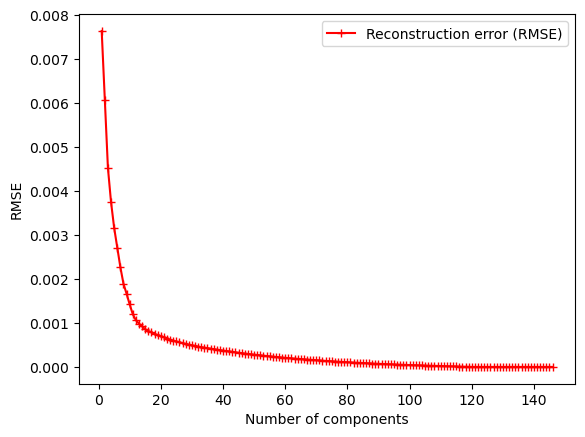

In [48]:
def reconstruction_error(X, principal_components, mu):
    """
    Calculates the reconstruction error after projecting data into a lower-dimensional space
    and then reconstructing it back to the original space. 

    Args:
        X: Original data matrix with shape NxD, where N is the number of samples and D is
           the number of original features.
        principal_components: A Dxk matrix containing the principal components used for 
           dimensionality reduction, where k is the number of components.
        mu: A D-element array representing the mean vector of the original data.

    Returns:
        The reconstruction error as a single float, representing the root mean squared
        error between the original and reconstructed data.
    """
    if principal_components.size == 0:
        X_recon = np.broadcast_to(mu, X.shape)
    else:
        X_centered = X - mu
        A = X_centered @ principal_components

        X_recon = A @ principal_components.T + mu

    diff = X - X_recon
    rmse = np.sqrt(np.mean(diff**2))
    return rmse

def reconstruction_error_plot(X, principal_components, mu):
    errs = []
    for i in range(len(principal_components)):
        errs.append(reconstruction_error(X, principal_components[:, :i], mu))

    x = np.arange(1, len(principal_components) + 1, 1)

    plt.figure()
    plt.xlabel('Number of components')
    plt.ylabel('RMSE')
    plt.plot(x, errs, 'r-+')
    plt.legend(['Reconstruction error (RMSE)'])
    plt.show()


reconstruction_error_plot(shapes, comp, mu)

<article class="message task"><a class="anchor" id="eval"></a>
    <div class="message-header">
        <span>Task 8: Reflection on reconstruction</span>
        <span class="has-text-right">
          
          
          <i class="bi bi-lightbulb-fill"></i>
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Why do we get a reconstruction error $\epsilon$?
2. What is the expected error $\epsilon$ when $k=D$? 
3. How does decreasing $k$ influence the error? (Quantify the error)



</div></article>



In [49]:
print("""
01. Because we are loosing some data, when we compress to less dimentions, we cant reconstruvt the whole dataset
02. 0, because there is no information loss
03. it increases the error, as the more dimensions we loose, the more information about the data we wont be able to recover
""")


01. Because we are loosing some data, when we compress to less dimentions, we cant reconstruvt the whole dataset
02. 0, because there is no information loss
03. it increases the error, as the more dimensions we loose, the more information about the data we wont be able to recover



<article class="message is-danger">
  <div class="message-header">Important</div>
  <div class="message-body">

  Only now start Mandatory Assignment 2 part 2.


  </div>
</article>
